1. Import necessary packages 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



2. Observe publishers contribution

In [3]:
data = pd.read_csv("../Data/raw_analyst_ratings.csv")
publisher_counts = data['publisher'].value_counts()

# Print the results
print(publisher_counts)


publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


3. Classify type of NEWS based on keyword 

In [5]:
# Define keywords for different news types
# Define keywords for different news types including stock market
keywords = {
    'Economy': ['economy', 'financial', 'stock', 'market', 'investment', 'economics', 'recession', 'inflation', 'GDP', 'interest rates'],
    'Health': ['health', 'vaccine', 'pandemic', 'hospital', 'disease', 'COVID-19', 'outbreak', 'healthcare', 'epidemic'],
    'Technology': ['technology', 'software', 'AI', 'innovation', 'device', 'tech', 'gadget', 'startup', 'cybersecurity'],
    'Politics': ['election', 'policy', 'government', 'senator', 'congress', 'president', 'campaign', 'legislation', 'politician'],
    'Sports': ['football', 'soccer', 'team', 'score', 'athlete', 'tournament', 'league', 'match', 'player', 'coach'],
    'Stock Market': ['stock', 'market', 'investment', 'share', 'equity', 'trading', 'broker', 'portfolio', 'dividend', 'IPO', 'bull market', 'bear market', 'NASDAQ', 'NYSE']
}


# Function to categorize headlines based on keywords
def categorize_headline(headline):
    for category, kws in keywords.items():
        if any(kw in headline.lower() for kw in kws):
            return category
    return 'Other'

# Apply the categorization function
data['news_category'] = data['headline'].apply(categorize_headline)

# Count the number of publications by publisher and category
publisher_category_counts = data.groupby(['publisher', 'news_category']).size().unstack()

# Print the results
print(publisher_category_counts)


news_category               Economy  Health    Other  Politics  Sports  \
publisher                                                                
47ertrends                     18.0     NaN      NaN       NaN     NaN   
AARP                            NaN     NaN      7.0       NaN     NaN   
ABNNewswire                     NaN     NaN     12.0       NaN     NaN   
Aakin                           NaN     NaN      5.0       NaN     NaN   
Aaron Jackson.Ed                5.0     NaN     11.0       NaN     NaN   
...                             ...     ...      ...       ...     ...   
vic@forextraininggroup.com      NaN     NaN      1.0       NaN     NaN   
vishwanath@benzinga.com        61.0    22.0   1658.0       NaN     NaN   
vivek.proactive@gmail.com       7.0     1.0    106.0       NaN     NaN   
wallstreet1928                  2.0     NaN      6.0       NaN     NaN   
webmaster                    2441.0   206.0  15277.0      13.0   115.0   

news_category               Stock Mar

4. Get top 20 publishers to see the effect of catagory on their publications

In [8]:
# Get the top 20 publishers
top_publishers = publisher_counts.head(20).index

# Filter the dataset for the top 20 publishers
df_top_publishers = data[data['publisher'].isin(top_publishers)]

print(df_top_publishers['publisher'].value_counts())

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


In [9]:
# Count the number of publications by publisher and category
publisher_category_counts = df_top_publishers.groupby(['publisher', 'news_category']).size().unstack()

# Print the results
print(publisher_category_counts)


news_category       Economy  Health     Other  Politics  Sports  Stock Market  \
publisher                                                                       
Allie Wickman        2848.0   277.0   12913.0     184.0    57.0        1224.0   
Benzinga Newsdesk   50235.0  4901.0   64190.0    2140.0   201.0       24134.0   
Benzinga Staff       3693.0   463.0   19826.0     293.0   136.0        2569.0   
Benzinga_Newsdesk    2569.0   356.0   14389.0     132.0    35.0        1167.0   
Charles Gross        7718.0  2433.0   72170.0    1706.0   268.0        9356.0   
Craig Jones          1150.0   134.0   13198.0      13.0    24.0        1471.0   
ETF Professor        1892.0   289.0   23112.0     185.0    75.0        2235.0   
Eddie Staley         5704.0  1147.0   42676.0     622.0   211.0        4002.0   
Hal Lindon           6245.0  1546.0   32038.0     493.0   112.0        6274.0   
Jayson Derrick       6996.0   181.0   10443.0     134.0   136.0         743.0   
Juan Lopez           2741.0 

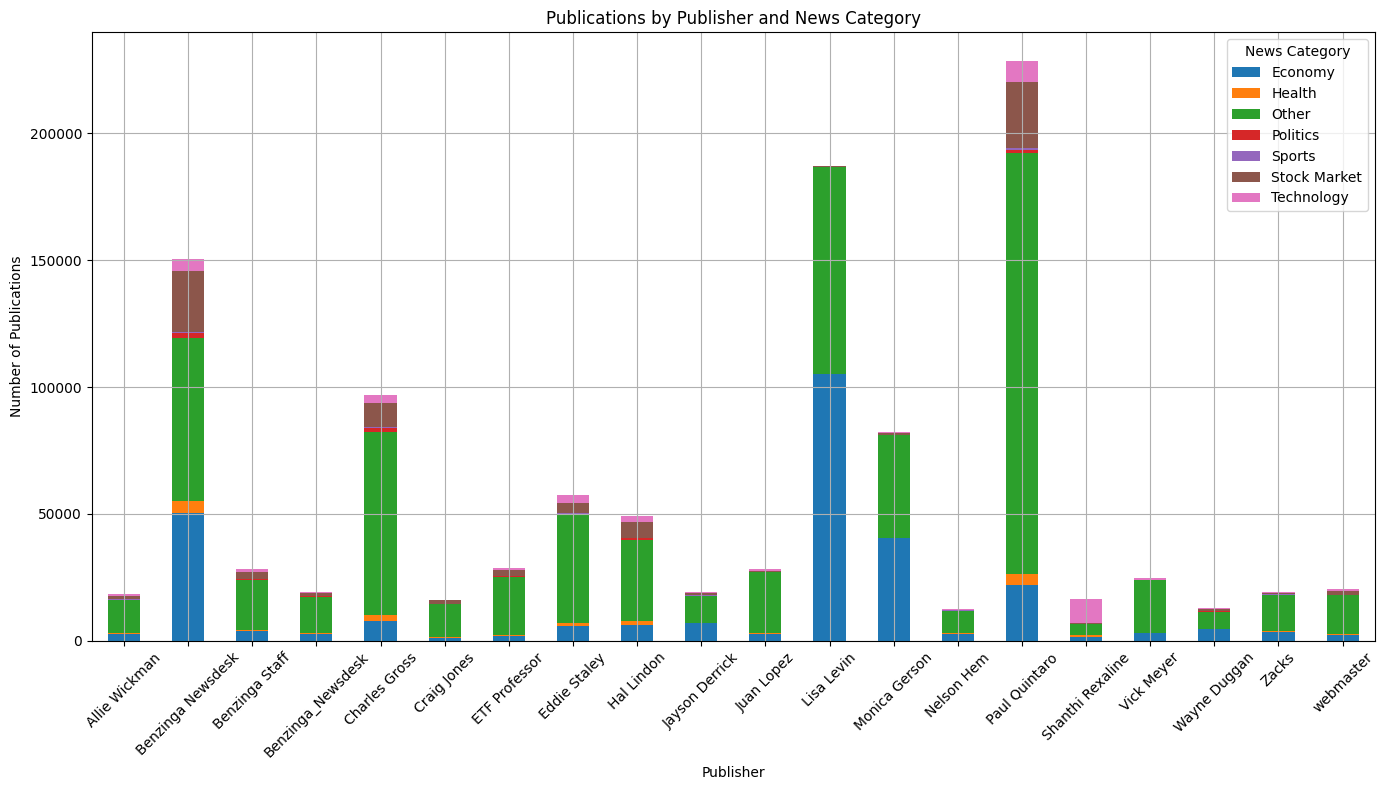

In [10]:
import matplotlib.pyplot as plt

# Plot the number of publications by publisher and category
fig, ax = plt.subplots(figsize=(14, 8))
publisher_category_counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Publications by Publisher and News Category')
plt.xlabel('Publisher')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.legend(title='News Category')
plt.grid(True)
plt.tight_layout()
plt.show()
